안심귀가 키워드로 수집한 뉴스 데이터 : 워드클라우드 & 네이버 api를 이용한 감성분석

# 01. 안심이 키워드 워드클라우드

In [1]:
from konlpy.tag import Okt
from collections import Counter
import wordcloud

import numpy as np  
import pandas as pd

#이미지 불러와서 사용할 것
from PIL import Image  
import matplotlib.pyplot as plt 

# 시각화시 글자 선명하게 출력하기 위함
#from IPython.display import set_matplotlib_formats
#set_matplotlib_formats('retina')

#한글폰트 깨짐 처리
import matplotlib.pyplot as plt
from matplotlib import font_manager
font_fname = 'C:/Windows/Fonts/malgun.ttf'
font_family = font_manager.FontProperties(fname=font_fname).get_name()
plt.rcParams["font.family"] = font_family

In [2]:
# 01. 데이터 불러오기
import pandas as pd
data = pd.read_excel('안심현황내용완성.xlsx')

In [3]:
contents = data['내용']
st=" "
for i in range(len(contents)):
    st+=contents[i]

In [4]:
okt = Okt()
nouns_list = okt.nouns(st)
cnt= Counter(nouns_list)

## * 명사만 추출하여 워드클라우드 작성해봄

In [5]:
# 데이터 정제
#stopwords=['']

for noun in nouns_list:
    if len(noun) == 1:
      nouns_list.remove(noun)
    #if noun in stopwords:
    #  nouns_list.remove(noun)

cnt2= Counter(nouns_list)
cnt2.most_common(100)

[('안심', 319),
 ('귀가', 235),
 ('여성', 177),
 ('스카우트', 173),
 ('서비스', 163),
 ('서울시', 118),
 ('상황', 94),
 ('이용', 76),
 ('운영', 73),
 ('안전', 72),
 ('사업', 70),
 ('신고', 62),
 ('스마트', 62),
 ('지역', 61),
 ('범죄', 59),
 ('인원', 51),
 ('이용자', 50),
 ('조명', 49),
 ('자치구', 48),
 ('구축', 48),
 ('설치', 46),
 ('예산', 44),
 ('지원', 43),
 ('서울', 43),
 ('센터', 43),
 ('통해', 41),
 ('위해', 40),
 ('신청', 40),
 ('시스템', 40),
 ('동행', 38),
 ('배치', 37),
 ('청소년', 34),
 ('가구', 32),
 ('시간', 31),
 ('명의', 31),
 ('긴급', 31),
 ('스마트폰', 31),
 ('경우', 30),
 ('대원', 30),
 ('기준', 30),
 ('모니터링', 30),
 ('택시', 30),
 ('관제', 29),
 ('발생', 28),
 ('예방', 28),
 ('인근', 28),
 ('위급', 26),
 ('광진구', 26),
 ('방범', 26),
 ('기능', 25),
 ('경찰', 24),
 ('또한', 24),
 ('환경', 23),
 ('조성', 23),
 ('증가', 23),
 ('확대', 23),
 ('통합', 23),
 ('구민', 23),
 ('위치', 22),
 ('개선', 22),
 ('추진', 22),
 ('건수', 22),
 ('갓길', 21),
 ('현재', 21),
 ('출동', 21),
 ('고려', 20),
 ('성범죄', 20),
 ('사용', 20),
 ('확인', 20),
 ('대한', 20),
 ('건', 20),
 ('기자', 19),
 ('시민', 19),
 ('시범', 19),
 ('계획', 19),
 ('도시

In [6]:
cnt_list = cnt2.most_common(50)
lst, cn =[],[]
for i in range(10): 
    lst.append(cnt_list[i][0] )
    cn.append(cnt_list[i][1] )

freq = pd.DataFrame({'단어':lst, '빈도':cn} )
freq

,단어,빈도
0,안심,319
1,귀가,235
2,여성,177
3,스카우트,173
4,서비스,163
5,서울시,118
6,상황,94
7,이용,76
8,운영,73
9,안전,72


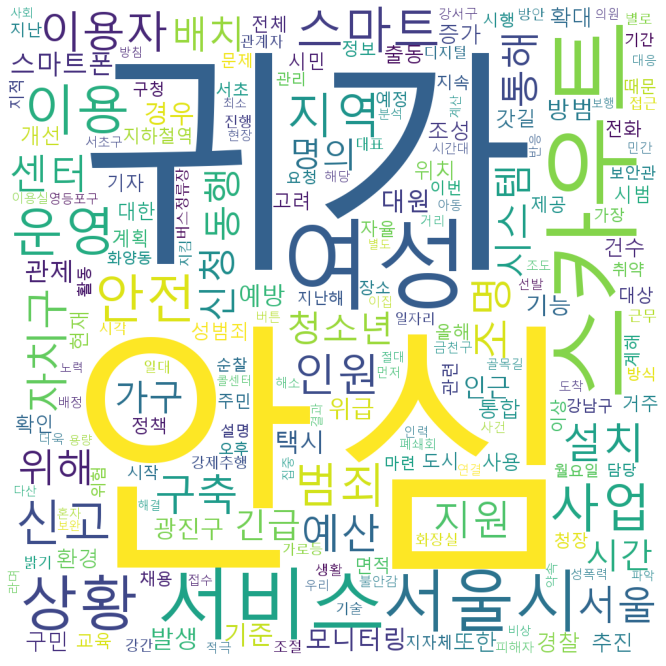

<Figure size 432x288 with 0 Axes>

In [13]:
# 이미지 이용없이 생성
font_path = 'C:/Windows/Fonts/malgun.ttf'
cloud_image= wordcloud.WordCloud(background_color='white', font_path = font_path, width = 1000, height = 1000).generate_from_frequencies(cnt2) 
plt.figure(figsize=(12,12))
plt.imshow(cloud_image)
plt.axis("off")
plt.show()
plt.savefig("ricewordcloud.png")

## * 명사 형용사 동사 모두 추출

In [118]:
# 카테고리별 top100 명사 형용사 동사 빈도 데이터프레임 생성 함수
def hj_top100_relation_keywords(data2):

    # contents str로 처리
    q= ""
    for i in range(len(data2)):
        try:
            q += data2[i]
        except:
            pass

    # 형태소 분석 ( norm : 정규화 )
    okt_pos = Okt().pos(q, norm=True, stem=True)   
    okt_filtering_n = [x for x, y in okt_pos if y in ['Noun']]   # 명사
    okt_filtering_adj = [x for x, y in okt_pos if y in [ 'Adjective'] ]  # 형용사
    okt_filtering_v = [x for x, y in okt_pos if y in [ 'Verb']]  # 동사
        
    
    #정제
    for anoun in okt_filtering_n:
        if len(anoun) == 1:
            okt_filtering_n.remove(anoun)

    
    #빈도파악
    count_n = Counter(okt_filtering_n)
    count_adj = Counter(okt_filtering_adj)
    count_v = Counter(okt_filtering_v)

    #데이터 프레임으로 저장하려고 각 리스트로 저장
    what = [count_n, count_adj, count_v]
    for w in what:
        temp_w, temp_c, rank  =[], [], []
        for num in range(0,100):
            temp_w.append( w.most_common(100)[num][0] )
            temp_c.append( w.most_common(100)[num][1] )            
            rank.append(num + 1)

        #저장
        if w == count_n:
            r_n = pd.DataFrame({ '순위': rank, '명사':temp_w , 'count': temp_c })
        if w == count_adj:
            r_adj = pd.DataFrame({ '순위': rank,'형용사':temp_w , 'count': temp_c })
        if w == count_v:
            r_v = pd.DataFrame({ '순위': rank,'동사':temp_w , 'count': temp_c })
        
    total = pd.concat(  [ r_n , r_adj, r_v] , axis= 1)
    return total

In [112]:
result= hj_top100_relation_keywords(st)
result

,순위,명사,count,순위,형용사,count,순위,동사,count
0,1,안심,319,1,있다,214,1,하다,778
1,2,귀가,235,2,안전하다,40,2,되다,156
2,3,여성,177,3,많다,33,3,돼다,44
3,4,스카우트,173,4,이다,33,4,않다,42
4,5,서비스,163,5,없다,32,5,되어다,31
...,...,...,...,...,...,...,...,...,...
95,96,관련,16,96,설치다,1,96,맴돌다,2
96,97,예정,16,97,낡다,1,97,채우다,2
97,98,계해,16,98,오래되다,1,98,자르다,2
98,99,장소,15,99,검다,1,99,맡다,2


In [20]:
result.to_excel('안심현황_word_freq.xlsx', encoding='utf-8')

안심이에 관한 현황 파악시 형용사에 관한 키워드가 적합하고 파악하여 형용사를 추출

## 형용사 워드클라우드

In [127]:
# contents str로 처리
q= ""
for i in range(len(data['내용'])):
    try:
        q += data['내용'][i]
    except:
        pass

okt_pos = Okt().pos(q, norm=True, stem=True)   
okt_filtering_adj = [x for x, y in okt_pos if y in [ 'Adjective'] ]  # 형용사
count_adj = Counter(okt_filtering_adj)

In [135]:
# 데이터 정제
stopwords=['있다','이다','많다','아니다','구매','낮다','같다']

nouns_list = okt.nouns(st)
cnt= Counter(nouns_list)

for adj in okt_filtering_adj:
    if adj in stopwords:
      okt_filtering_adj.remove(adj)

count_adj= Counter(okt_filtering_adj)
count_adj.most_common(100)

[('안전하다', 40),
 ('없다', 32),
 ('신속하다', 26),
 ('가능하다', 24),
 ('필요하다', 19),
 ('높다', 18),
 ('다양하다', 11),
 ('부족하다', 11),
 ('있다', 11),
 ('다르다', 9),
 ('어렵다', 9),
 ('좋다', 8),
 ('어둡다', 7),
 ('심각하다', 7),
 ('편하다', 7),
 ('기대하다', 6),
 ('어떻다', 6),
 ('저조하다', 6),
 ('멀다', 5),
 ('당하다', 5),
 ('인하다', 5),
 ('위급하다', 5),
 ('더하다', 5),
 ('많다', 5),
 ('심하다', 4),
 ('짙다', 4),
 ('적절하다', 4),
 ('새롭다', 4),
 ('드물다', 4),
 ('미흡하다', 4),
 ('원활하다', 4),
 ('넓다', 3),
 ('이렇다', 3),
 ('가깝다', 3),
 ('들쭉날쭉하다', 3),
 ('비슷하다', 3),
 ('충분하다', 3),
 ('명확하다', 3),
 ('밤늦다', 3),
 ('불과하다', 3),
 ('연결하다', 3),
 ('별다르다', 3),
 ('편리하다', 3),
 ('위험하다', 3),
 ('행복하다', 3),
 ('근접하다', 3),
 ('역다', 2),
 ('화하다', 2),
 ('무사하다', 2),
 ('적합하다', 2),
 ('작다', 2),
 ('자세하다', 2),
 ('꾸준하다', 2),
 ('무섭다', 2),
 ('정확하다', 2),
 ('진하다', 2),
 ('뚜렷하다', 2),
 ('알맞다', 2),
 ('뿐이다', 2),
 ('아쉽다', 2),
 ('연하다', 2),
 ('힘들다', 2),
 ('힘드다', 2),
 ('단순하다', 2),
 ('그렇다', 2),
 ('뻔하다', 2),
 ('번거롭다', 2),
 ('전화하다', 2),
 ('원하다', 2),
 ('꼼꼼하다', 2),
 ('좁다', 2),
 ('의하다', 2),
 ('이다', 2),
 ('은은하다', 1),
 ('강

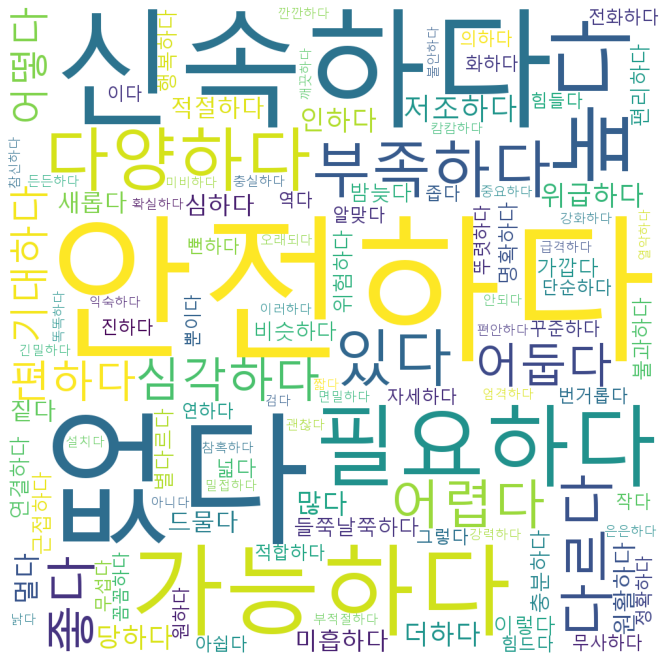

<Figure size 432x288 with 0 Axes>

In [152]:
# 이미지 이용없이 생성
palettes = ['spring', 'summer', 'seismic','PuBu']
font_path = 'C:/Windows/Fonts/malgun.ttf'
wordcloud.WordCloud(background_color='white',
                    font_path = font_path,
                    width = 1000, height = 1000,
                    colormap = palettes[1]
                    ).generate_from_frequencies(count_adj)
plt.figure(figsize=(12,12))
plt.imshow(cloud_image)
plt.axis("off")
plt.show()
plt.savefig("안심이adjwordcloud.png")

# 02. 네이버 api이용 감성분석

In [54]:
# 연습
import sys
import requests
import json

client_id = " ### "
client_secret = " ### "
url="https://naveropenapi.apigw.ntruss.com/sentiment-analysis/v1/analyze"

headers = {
    "X-NCP-APIGW-API-KEY-ID": client_id,
    "X-NCP-APIGW-API-KEY": client_secret,
    "Content-Type": "application/json"
}

content = "싸늘하다. 가슴에 비수가 날아와 꽂힌다."
data = {
  "content": content
}

print(json.dumps(data, indent=4, sort_keys=True))
response = requests.post(url, data=json.dumps(data), headers=headers)
rescode = response.status_code
if(rescode == 200):
    print (response.text)
else:
    print("Error : " + response.text)

{
    "content": "\uc2f8\ub298\ud558\ub2e4. \uac00\uc2b4\uc5d0 \ube44\uc218\uac00 \ub0a0\uc544\uc640 \uaf42\ud78c\ub2e4."
}
{"document":{"sentiment":"negative","confidence":{"negative":99.3676,"positive":0.0077638607,"neutral":0.62463653}},"sentences":[{"content":"싸늘하다.","offset":0,"length":5,"sentiment":"negative","confidence":{"negative":0.9961359,"positive":2.2740211E-4,"neutral":0.0036366575},"highlights":[{"offset":0,"length":4}]},{"content":" 가슴에 비수가 날아와 꽂힌다.","offset":5,"length":17,"sentiment":"negative","confidence":{"negative":0.927976,"positive":7.042612E-4,"neutral":0.07131973},"highlights":[{"offset":1,"length":15}]}]}


In [100]:
data = pd.read_excel('안심현황내용완성.xlsx')
import re
#정제
data['내용'] = [re.sub('[^ A-Za-z0-9가-힣]', '', s) for s in data['내용']] #한글,숫자,영어,띄어쓰기 제거

# 네이버 감성분석 api는 한번에 1000자까지만 입력으로 받음 최대한 횟수를 줄여서 돌리기 위해 1000자씩 나눔
# 문장 합치기
p =[]
all_text = ''
for i in data['내용']:
    all_text += i
for n in range(0,44):
    #globals()['thou_text{}'.format(n)] = all_text[1000*n:1000*(n+1)]
    p.append(all_text[1000*n:1000*(n+1)]) 

In [101]:
sentence, sentiment, = [],[]

# content 지정
for n in range(len(p)): # 감성분석할 데이터 세트 
    content = p[n] # 세트 넣기

    # 딕셔너리 생성
    data = { "content": content }

    # print(json.dumps(data, indent=4, sort_keys=True))
    result = json.loads(str(requests.post(url, data=json.dumps(data), headers=headers).text))

    for i in range( len(result["sentences"]) ):
          sentence.append( result['sentences'][i]['content'] )
          sentiment.append( result['sentences'][i]['sentiment'] )

In [102]:
total_result = pd.DataFrame({'문장':sentence, '감성':sentiment })
total_result

,문장,감성
0,한국정경신문김영훈 기자 서울시 서초구구청장 조은희는 여성이 안심하고 걸을 수 있는 ...,positive
1,셉티드CPTED안내판은 어두운 밤에도 안내판이 잘 보이도록 야간 시인성을 높였으며 ...,positive
2,또 친환경 솔라타입으로 별도 전기료가 발생하지 않는다이 외에도 셉티드 안내판은 위...,positive
3,설치지역 선정은 지역내 경찰과 협업해 교통안내판 및 CCTV단속안내판 등 부착물이 ...,positive
4,특히 역세권 세이프티존을 강화하기 위해 안심 비상벨 폴리스팟 고보조명 고성능 CC...,positive
...,...,...
580,3 안심이앱안심이 앱은 자치구별로 운영 중인 통합관제센터가 컨트롤타워가 돼 서울 ...,positive
581,또한 112에 신고하지 않아도 전원 버튼이나 화면터치 흔들기만으로 SOS 호출이 가...,neutral
582,바로 자치구의 CCTV 통합관제센터로 자동 신고되며 관제센터는 신고자 주변 CCT...,neutral
583,앱에 사진영상 촬영 기능이 있어 CCTV 사각지대에서 벌어지는 상황도 사진이나 영...,neutral


In [103]:
# 엑셀로 저장
total_result.to_excel('naver_senti_안심이현황.xlsx',encoding='utf-8')